# Grover's Algorithm Report

## Part 1
### Introduction
Grover's algorithm is implemented in this section. Grover's algorithm is a quantum algorithm designed to search an unsorted database of items quadratically faster than classical algorithms.

### Importing Libraries
The necessary libraries for implementing the algorithm are imported, including numpy for numerical operations, Qiskit for quantum computing, and its relevant components like QuantumCircuit, ClassicalRegister, QuantumRegister, and visualization tools.


In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, transpile, assemble
from qiskit.circuit.library import CU1Gate
from qiskit.visualization import *

### `CCCZ` Function
The `CCCZ` function is defined to implement a Controlled-Z gate. It serves as a circuit within the oracle and diffusion circuits to perform controlled-Z operations with phase factors on the given quantum bits.

In [3]:
def CCCZ(circuit, quantum):
    cu1_positive = CU1Gate(theta= np.pi/4)
    cu1_negative = CU1Gate(theta=-np.pi/4)
    
    circuit.append(cu1_positive,[quantum[0], quantum[3]])
    circuit.cx(quantum[0], quantum[1])
    circuit.append(cu1_negative,[quantum[1], quantum[3]])
    circuit.cx(quantum[0], quantum[1])
    circuit.append(cu1_positive,[quantum[1], quantum[3]])
    circuit.cx(quantum[1], quantum[2])
    circuit.append(cu1_negative,[quantum[2], quantum[3]])
    circuit.cx(quantum[0], quantum[2])
    circuit.append(cu1_positive,[quantum[2], quantum[3]])
    circuit.cx(quantum[1], quantum[2])
    circuit.append(cu1_negative,[quantum[2], quantum[3]])
    circuit.cx(quantum[0], quantum[2])
    circuit.append(cu1_positive,[quantum[2], quantum[3]])    

### `oracle` Function
The `oracle` function is defined to create the oracle operator. The oracle operator marks the target state in Grover's algorithm. It flips the phase of the target state by applying the `CCCZ` gate with suitable phase factors.

In [4]:
def oracle(circuit, quantum, target_state): 
    for i, bit in enumerate(target_state):
        if bit == '0':
            circuit.x(quantum[i])

    CCCZ(circuit, quantum)            
    
    for i, bit in enumerate(target_state):
        if bit == '0':
            circuit.x(quantum[i])
            
    circuit.barrier(quantum)

### `diffusion` Function
This function is defined to construct the diffusion operator in Grover's algorithm. It inverts the amplitude of the state with the maximum probability, creating constructive interference to amplify the target state.

In [5]:

def diffusion(circuit, quantum):
    circuit.h(quantum)
    circuit.x(quantum)
    
    CCCZ(circuit, quantum)
    
    circuit.x(quantum)
    circuit.h(quantum)
    
    circuit.barrier(quantum)

### `Grover` Function
The `Grover` function is defined, combining the steps of initializing the superposition, applying the oracle, and performing diffusion operators iteratively. This function allows Grover's algorithm to search for the marked state efficiently.

In [25]:
def Grover(circuit, quantum, target_state):
    circuit.h(quantum)
    oracle(circuit, quantum, target_state)
    # for i in range(int(np.sqrt(2))):
    #     diffusion(circuit, quantum)
    diffusion(circuit, quantum)
    diffusion(circuit, quantum)
    diffusion(circuit, quantum)
    # Odd numbers work, even numbers make it random

### Quantum and Classical Registers
A quantum register with 4 qubits and a classical register with 4 bits are created to store quantum and classical data, respectively.



In [22]:
quantum = QuantumRegister(4, "Quantum")
classical = ClassicalRegister(4, "Classical")

circuit = QuantumCircuit(quantum,classical)

for qubit in quantum:
    circuit.reset(qubit)

### Initialization and Target State
The marked state is set to "1011," and the target state is computed by reversing the marked state. The `Grover` function is then called to construct the quantum circuit, and the circuit is drawn and saved as an image.

1101


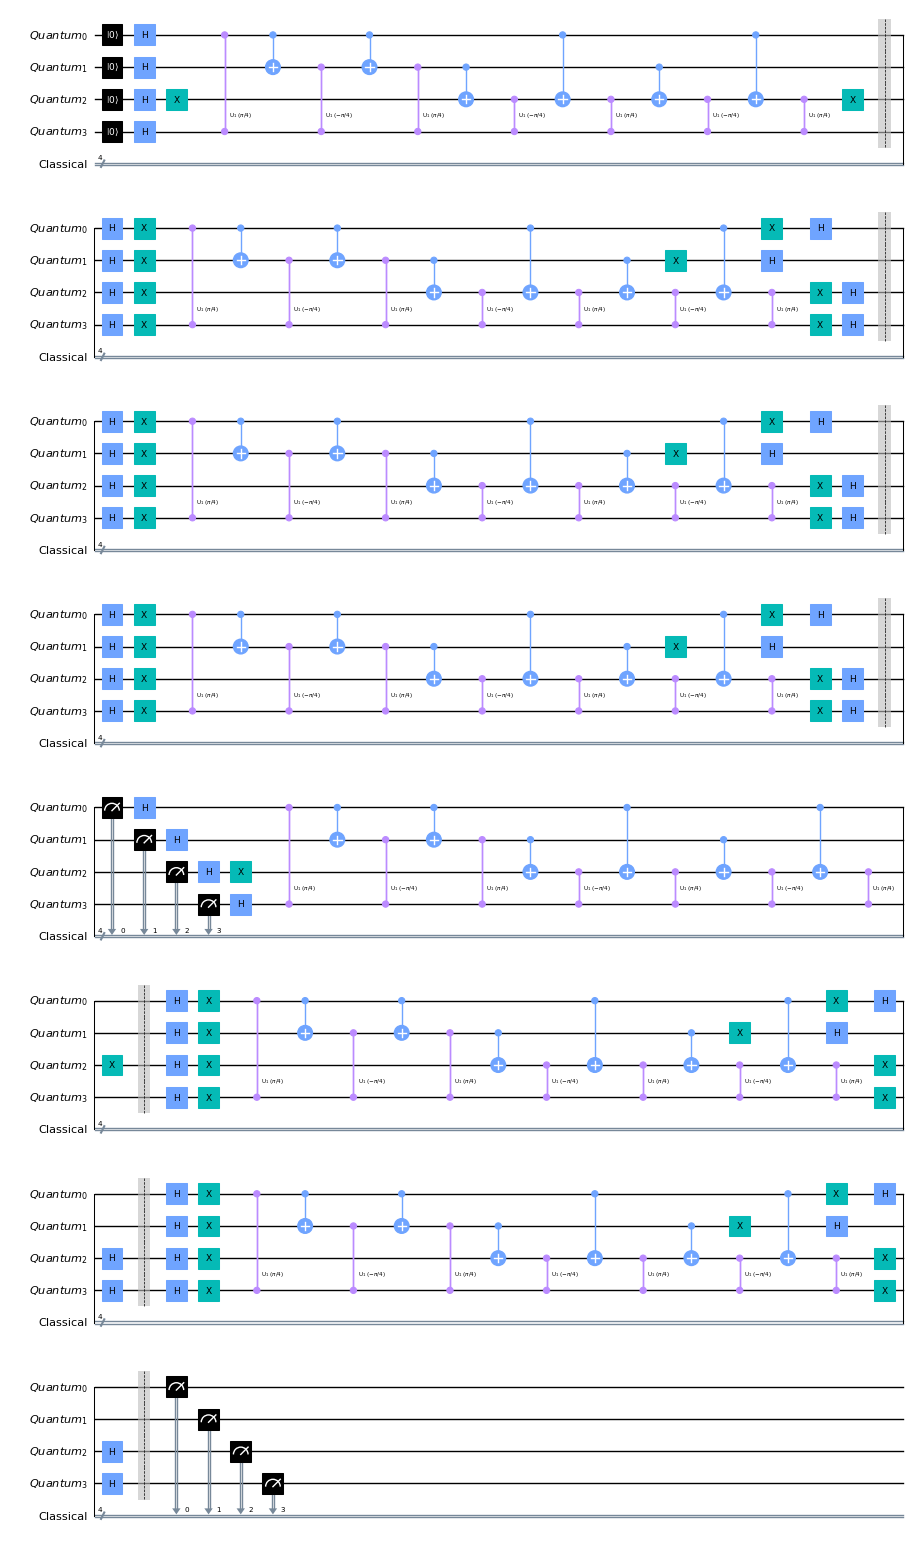

In [26]:
marked_state = "1011"
target_state = "".join(list(reversed(marked_state)))
print(target_state)
Grover(circuit, quantum, target_state)
        
circuit.measure(quantum, classical)
circuit.draw(output='mpl', filename='circuit.png', scale=0.5)

### Running the Quantum Circuit
The quantum circuit is simulated using the Qiskit Aer simulator. A job is executed with 10024 shots (repetitions), and the result is obtained. Finally, the measurement counts are retrieved, printed, and visualized as a histogram using Qiskit's `plot_histogram` function.

{'1101': 594, '0000': 611, '1000': 650, '1110': 625, '1100': 596, '1001': 612, '0001': 602, '1010': 605, '0011': 665, '0110': 645, '1111': 625, '0010': 610, '0101': 630, '1011': 685, '0111': 621, '0100': 648}


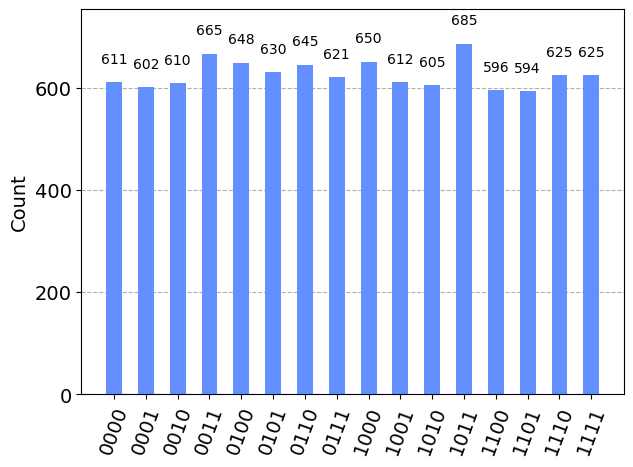

In [27]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=10024)
result = job.result()

# Get and print the measurement counts
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## Part 2
### Introduction
This section introduces a modification of Grover's algorithm with a double target oracle, allowing the search for two distinct marked states.

### Importing Libraries
Necessary libraries are imported for the implementation of the modified algorithm.

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

### `double_target_oracle` Function
The `double_target_oracle` function is defined, constructing an oracle with two target states. It applies a phase flip for each of the two target states using the `CCCZ` gate.

In [11]:
# Define the double target oracle
def double_target_oracle(circuit, quantum, target_state1, target_state2):
    # Apply a phase flip for the first target state
    for i, bit in enumerate(target_state1):
        if bit == '0':
            circuit.x(quantum[i])
    CCCZ(circuit, quantum)
    for i, bit in enumerate(target_state1):
        if bit == '0':
            circuit.x(quantum[i])

    # Apply a phase flip for the second target state
    for i, bit in enumerate(target_state2):
        if bit == '0':
            circuit.x(quantum[i])
    CCCZ(circuit, quantum)
    for i, bit in enumerate(target_state2):
        if bit == '0':
            circuit.x(quantum[i])

### `grover_diffusion` Function
This function redefines the `grover_diffusion` function, which creates the Grover diffusion operator, the same as in Part 1.

In [12]:
# Define the Grover diffusion operator (as provided in your original code)
def grover_diffusion(circuit, quantum):
    circuit.h(quantum)
    circuit.x(quantum)
    CCCZ(circuit, quantum)
    circuit.x(quantum)
    circuit.h(quantum)

### Quantum and Classical Registers
A quantum register with 4 qubits and a classical register with 4 bits are created again for storing quantum and classical data.

In [13]:
# Initialize a quantum register and classical register
quantum = QuantumRegister(4, "Quantum")
classical = ClassicalRegister(4, "Classical")

### Superposition and Target States
Hadamard gates are applied to create a superposition of all states. Two target states, "0010" and "1110," are defined for the double target oracle.

In [14]:
# Create a quantum circuit
circuit = QuantumCircuit(quantum, classical)

# Apply Hadamard gates to create a superposition of all states
circuit.h(quantum)

# Define the target states
marked_state1 = "0010"
marked_state2 = "1110"

target_state1 = "".join(list(reversed(marked_state1)))
target_state2 = "".join(list(reversed(marked_state2)))
print(marked_state1)
print(marked_state2)

0010
1110


### Grover Iterations
The number of Grover iterations is set (currently 1), and Grover's algorithm is executed. The double target oracle and Grover diffusion operator are applied iteratively.

In [15]:
# Number of Grover iterations (adjust for your problem size)
# num_iterations = int(round((pi / 4) * (2 ** 0.5)))
num_iterations = 1

# Perform Grover iterations
for _ in range(num_iterations):
    # Apply the double target oracle
    double_target_oracle(circuit, quantum, target_state1, target_state2)
    
    # Apply the Grover diffusion operator
    grover_diffusion(circuit, quantum)

# Measure the quantum register
circuit.measure(quantum, classical)

### Running the Quantum Circuit
Similar to Part 1, this cell simulates the quantum circuit using the Qiskit Aer simulator, executes the job, retrieves the measurement counts, and visualizes the results as a histogram.

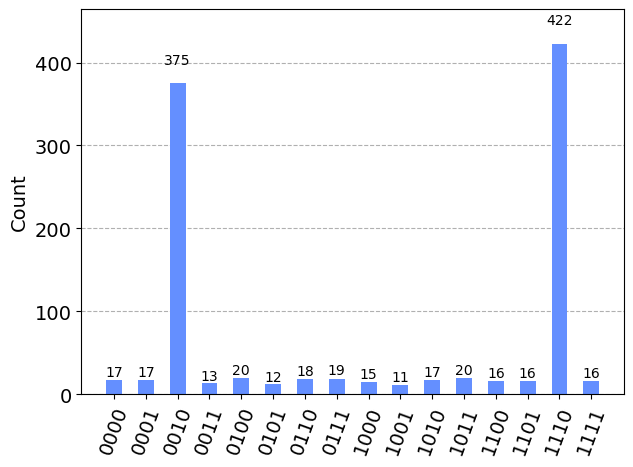

In [16]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()

# Get and plot the measurement counts
counts = result.get_counts()
plot_histogram(counts)

The provided code successfully implements Grover's algorithm, allowing efficient search for marked states in an unsorted database.
